In [4]:
# Setup and Imports
%load_ext autoreload
%autoreload 2

from data_structures import Node, Edge, Graph


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
"""
Snow Mechanical Parameters Calculation Graph Visualization

This notebook visualizes the directed graph of calculation methods for snow mechanical
parameters defined in definitions.py.

The graph includes:
- Parameter nodes (measured and calculated)
- Merge nodes (combining multiple inputs for a method)
- Edges (data flow and method transformations)

Visualizations included:
1. Custom hierarchical layout with detailed node styling
2. Spring layout using networkx
3. Detailed calculation path analysis
4. Focused subgraph visualizations for each parameter
"""

from definitions import graph

print("Graph loaded successfully!")
print(f"Total nodes: {len(graph.nodes)}")
print(f"Total edges: {len(graph.edges)}")


Graph loaded successfully!
Total nodes: 13
Total edges: 23


KeyError: 'merge_hand_hardness_grain_form'

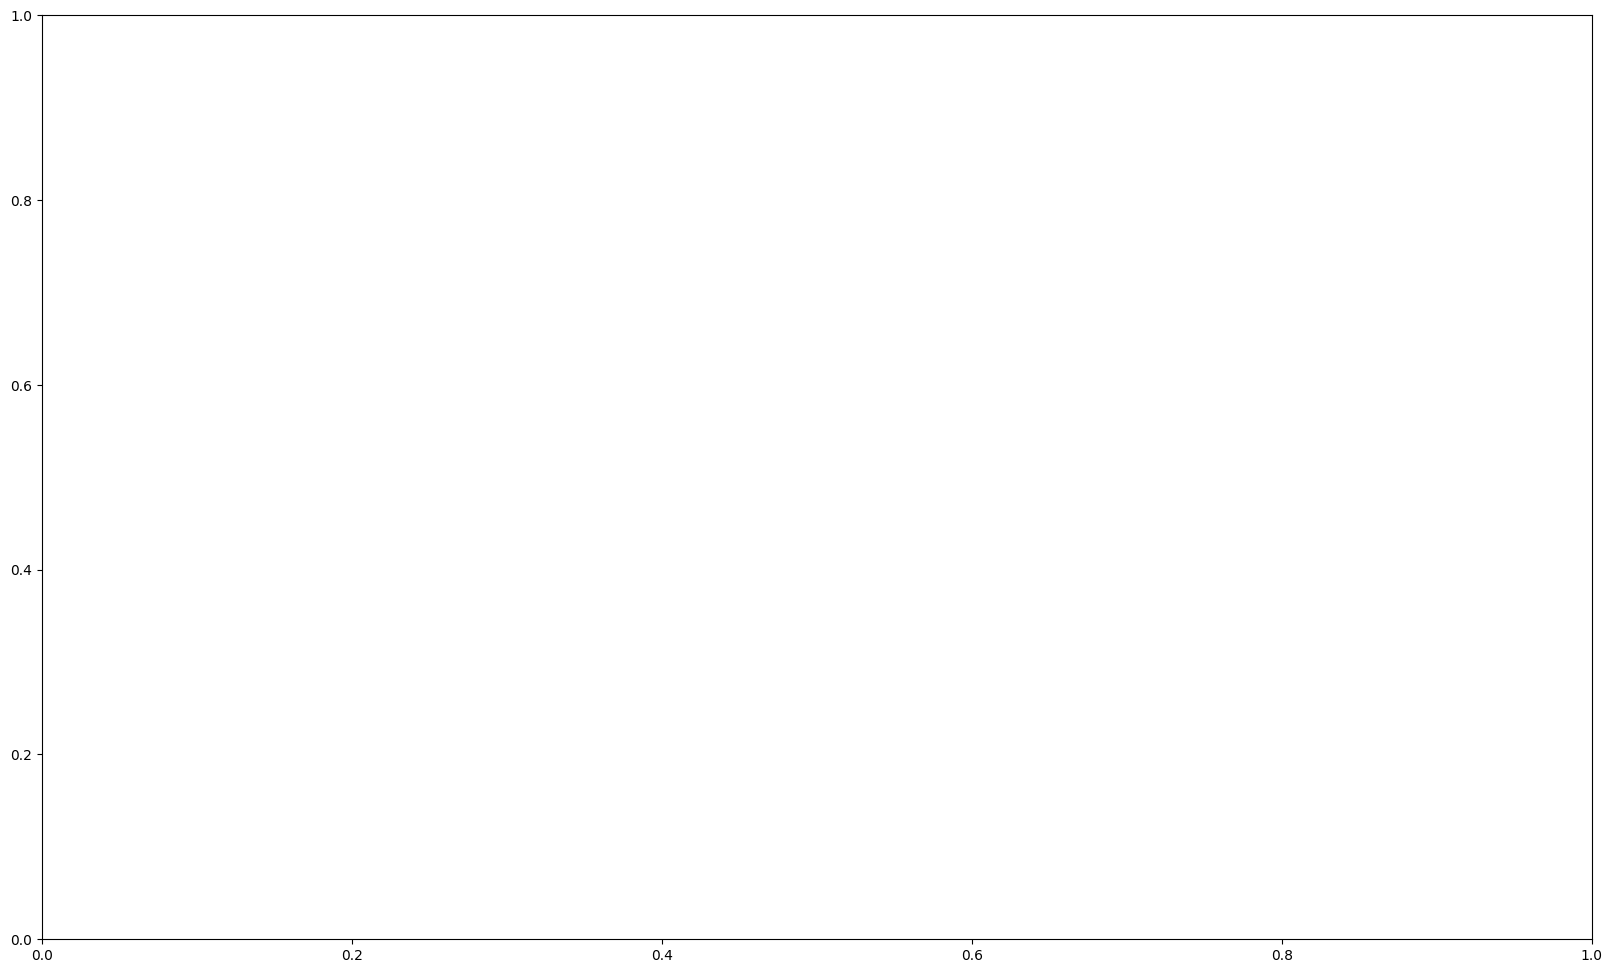

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Create a directed graph using networkx
G = nx.DiGraph()

# Add nodes with their types
for node in graph.nodes:
    G.add_node(node.parameter, node_type=node.type)

# Add edges
for edge in graph.edges:
    # Create edge label from method name if it exists
    label = edge.method_name if edge.method_name else ""
    G.add_edge(edge.start.parameter, edge.end.parameter, label=label)

# Create a hierarchical layout
# Separate nodes by type and level
measured_params = ['measured_density', 'measured_hand_hardness', 'measured_grain_form', 'measured_grain_size']
calculated_params = ['density', 'elastic_modulus', 'poissons_ratio', 'shear_modulus']
merge_nodes = [n.parameter for n in graph.nodes if n.type == 'merge']

# Create positions manually for better layout
pos = {}

# Level 0: Measured parameters (top)
y_level_0 = 5
for i, param in enumerate(measured_params):
    pos[param] = (i * 3, y_level_0)

# Level 1: Density merge nodes
y_level_1 = 3.5
density_merges = [n for n in merge_nodes if 'density' in n]
for i, param in enumerate(density_merges):
    pos[param] = (i * 3, y_level_1)

# Level 2: Density parameter
y_level_2 = 2.5
pos['density'] = (1.5, y_level_2)

# Level 3: Elastic modulus and other merge nodes
y_level_3 = 1.5
emod_merges = [n for n in merge_nodes if 'elastic_modulus' in n]
for i, param in enumerate(emod_merges):
    pos[param] = (i * 3, y_level_3)

# Poisson's ratio merge nodes
pr_merges = [n for n in merge_nodes if 'poissons_ratio' in n]
for i, param in enumerate(pr_merges):
    pos[param] = (6 + i * 3, y_level_3)

# Shear modulus merge nodes
sm_merges = [n for n in merge_nodes if 'shear_modulus' in n]
for i, param in enumerate(sm_merges):
    pos[param] = (12 + i * 3, y_level_3)

# Level 4: Final calculated parameters
y_level_4 = 0
pos['elastic_modulus'] = (1.5, y_level_4)
pos['poissons_ratio'] = (7.5, y_level_4)
pos['shear_modulus'] = (13.5, y_level_4)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Draw edges first (so they appear behind nodes)
for edge in graph.edges:
    start_pos = pos[edge.start.parameter]
    end_pos = pos[edge.end.parameter]
    
    # Determine edge color based on whether it has a method
    if edge.method_name:
        edge_color = 'darkblue'
        edge_width = 2.5
        edge_style = 'solid'
        alpha = 0.8
    else:
        edge_color = 'gray'
        edge_width = 1.5
        edge_style = 'dashed'
        alpha = 0.5
    
    # Draw arrow
    ax.annotate('', xy=end_pos, xytext=start_pos,
                arrowprops=dict(arrowstyle='->', lw=edge_width, 
                              color=edge_color, alpha=alpha,
                              linestyle=edge_style,
                              connectionstyle="arc3,rad=0.1"))
    
    # Add method label if it exists
    if edge.method_name:
        mid_x = (start_pos[0] + end_pos[0]) / 2
        mid_y = (start_pos[1] + end_pos[1]) / 2
        ax.text(mid_x, mid_y, edge.method_name, 
               fontsize=7, ha='center', va='bottom',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                        edgecolor='lightblue', alpha=0.8))

# Draw nodes
for node in graph.nodes:
    x, y = pos[node.parameter]
    
    # Determine node appearance based on type
    if node.type == 'parameter':
        if node.parameter in measured_params:
            color = 'lightgreen'
            shape = 'round,pad=0.3'
            label_prefix = '📊 '
        else:
            color = 'lightblue'
            shape = 'round,pad=0.3'
            label_prefix = '📈 '
    else:  # merge node
        color = 'lightcoral'
        shape = 'round,pad=0.2'
        label_prefix = '⊕ '
    
    # Create fancy box for node
    bbox = FancyBboxPatch((x - 0.8, y - 0.25), 1.6, 0.5,
                          boxstyle=shape,
                          facecolor=color, edgecolor='black',
                          linewidth=2, alpha=0.9)
    ax.add_patch(bbox)
    
    # Add text label
    display_name = node.parameter.replace('_', '\n')
    ax.text(x, y, label_prefix + display_name, 
           fontsize=8, ha='center', va='center',
           fontweight='bold' if node.type == 'parameter' else 'normal')

# Set axis properties
ax.set_xlim(-2, 18)
ax.set_ylim(-0.5, 5.5)
ax.axis('off')

# Add title and legend
ax.set_title('Snow Mechanical Parameters Calculation Graph', 
            fontsize=18, fontweight='bold', pad=20)

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Measured Parameters'),
    Patch(facecolor='lightblue', edgecolor='black', label='Calculated Parameters'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Merge Nodes'),
    plt.Line2D([0], [0], color='darkblue', linewidth=2.5, label='Method Edge'),
    plt.Line2D([0], [0], color='gray', linewidth=1.5, linestyle='--', label='Data Flow Edge')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 80)
print("GRAPH SUMMARY")
print("=" * 80)
print(f"Total Nodes: {len(graph.nodes)}")
print(f"  - Parameter Nodes: {len([n for n in graph.nodes if n.type == 'parameter'])}")
print(f"  - Merge Nodes: {len([n for n in graph.nodes if n.type == 'merge'])}")
print(f"Total Edges: {len(graph.edges)}")
print(f"  - Method Edges: {len([e for e in graph.edges if e.method_name])}")
print(f"  - Data Flow Edges: {len([e for e in graph.edges if not e.method_name])}")
print("=" * 80)


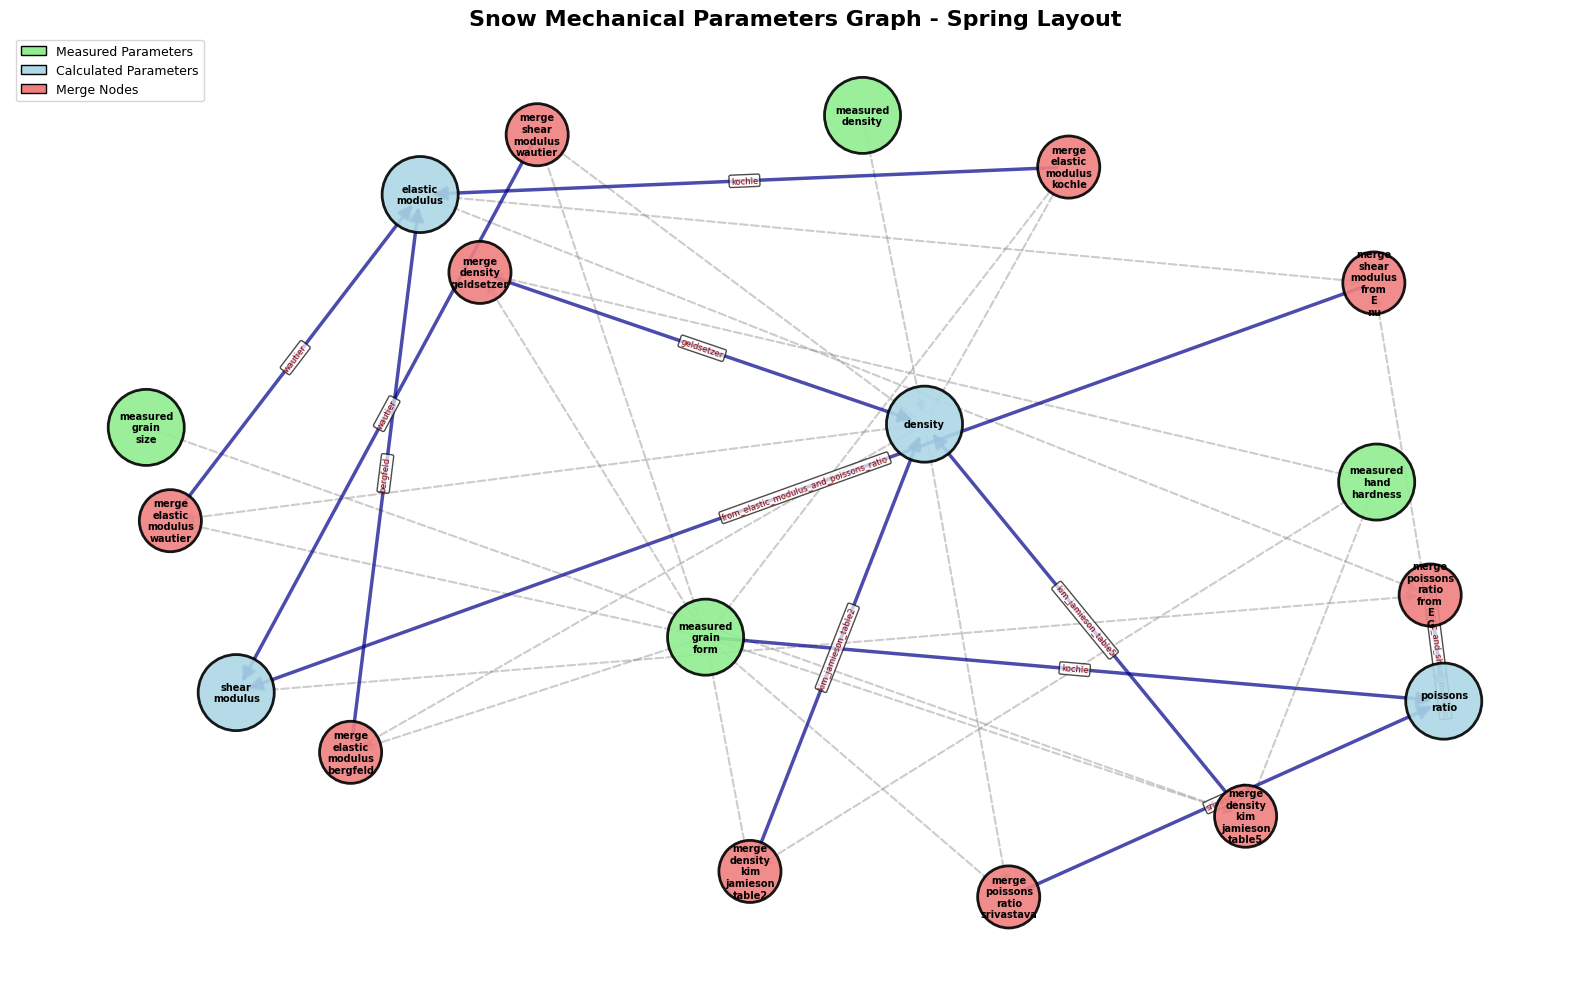

In [ ]:
# Alternative visualization: Hierarchical layout using graphviz-style
fig, ax = plt.subplots(figsize=(16, 10))

# Use hierarchical layout
pos_hier = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Separate nodes by type for coloring
node_colors = []
node_sizes = []
for node in G.nodes():
    node_obj = next(n for n in graph.nodes if n.parameter == node)
    if node_obj.type == 'parameter':
        if node in measured_params:
            node_colors.append('lightgreen')
            node_sizes.append(3000)
        else:
            node_colors.append('lightblue')
            node_sizes.append(3000)
    else:  # merge
        node_colors.append('lightcoral')
        node_sizes.append(2000)

# Draw edges with different styles
method_edges = [(e.start.parameter, e.end.parameter) for e in graph.edges if e.method_name]
data_edges = [(e.start.parameter, e.end.parameter) for e in graph.edges if not e.method_name]

# Draw data flow edges (dashed)
nx.draw_networkx_edges(G, pos_hier, edgelist=data_edges, 
                       edge_color='gray', style='dashed', 
                       alpha=0.4, width=1.5, arrows=True,
                       arrowsize=15, ax=ax)

# Draw method edges (solid)
nx.draw_networkx_edges(G, pos_hier, edgelist=method_edges,
                       edge_color='darkblue', style='solid',
                       alpha=0.7, width=2.5, arrows=True,
                       arrowsize=20, ax=ax)

# Draw nodes
nx.draw_networkx_nodes(G, pos_hier, node_color=node_colors,
                      node_size=node_sizes, alpha=0.9,
                      edgecolors='black', linewidths=2, ax=ax)

# Draw labels
labels = {node: node.replace('_', '\n') for node in G.nodes()}
nx.draw_networkx_labels(G, pos_hier, labels, font_size=7,
                       font_weight='bold', ax=ax)

# Add edge labels for methods
edge_labels = {(e.start.parameter, e.end.parameter): e.method_name 
               for e in graph.edges if e.method_name}
nx.draw_networkx_edge_labels(G, pos_hier, edge_labels, 
                             font_size=6, font_color='darkred',
                             bbox=dict(boxstyle='round,pad=0.2', 
                                     facecolor='white', alpha=0.7),
                             ax=ax)

ax.set_title('Snow Mechanical Parameters Graph - Spring Layout', 
            fontsize=16, fontweight='bold')
ax.axis('off')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Measured Parameters'),
    Patch(facecolor='lightblue', edgecolor='black', label='Calculated Parameters'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Merge Nodes'),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


FOCUSED VISUALIZATIONS FOR EACH CALCULATED PARAMETER



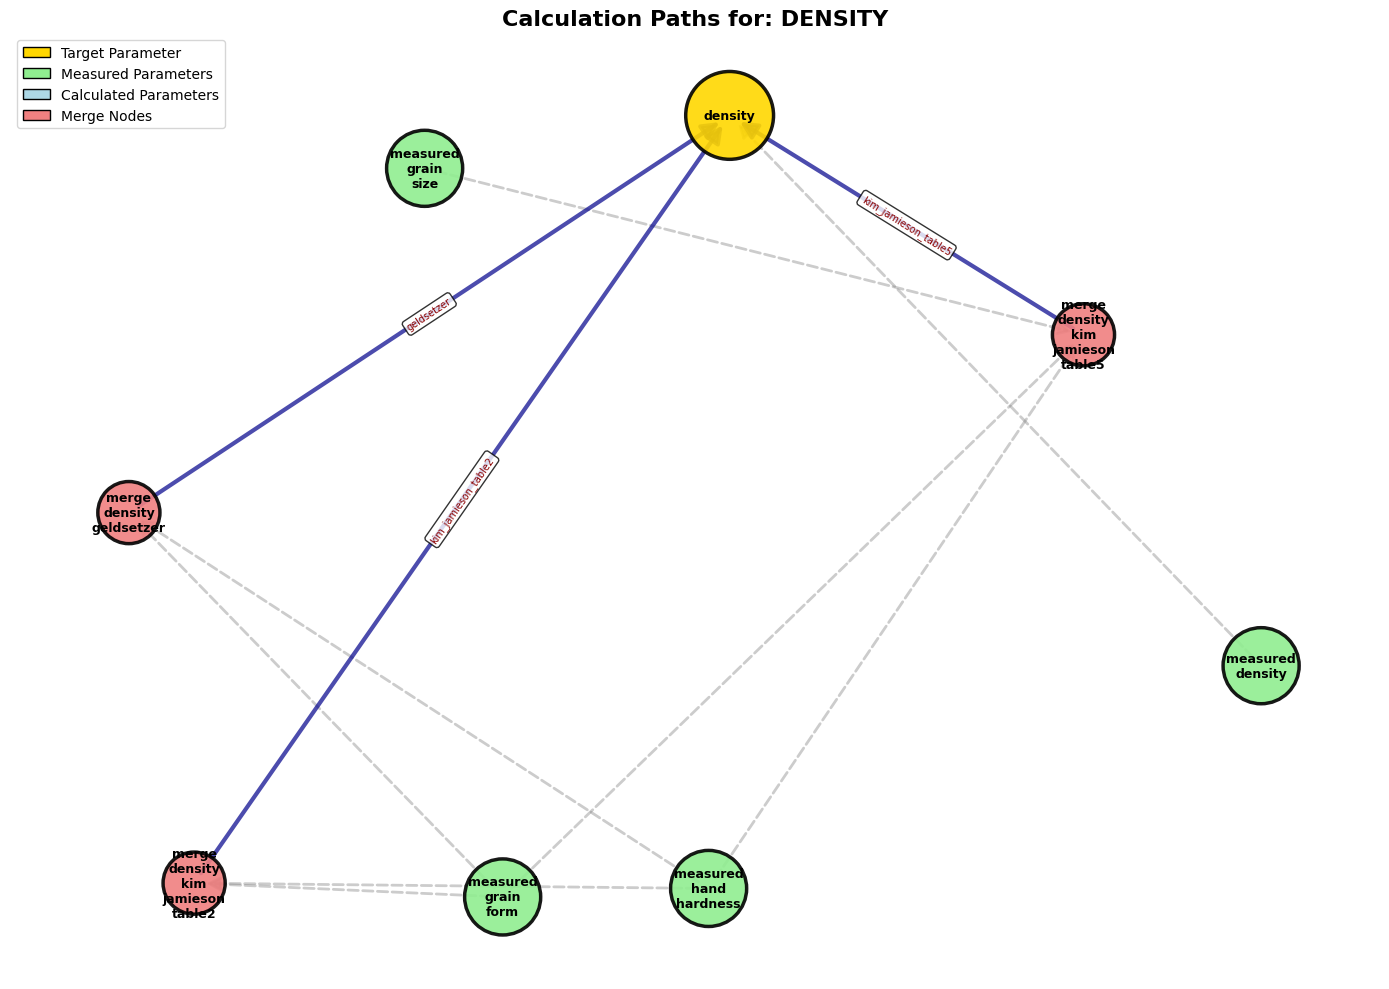

Subgraph for 'density':
  Nodes: 8
  Edges: 11
  Methods available: 3



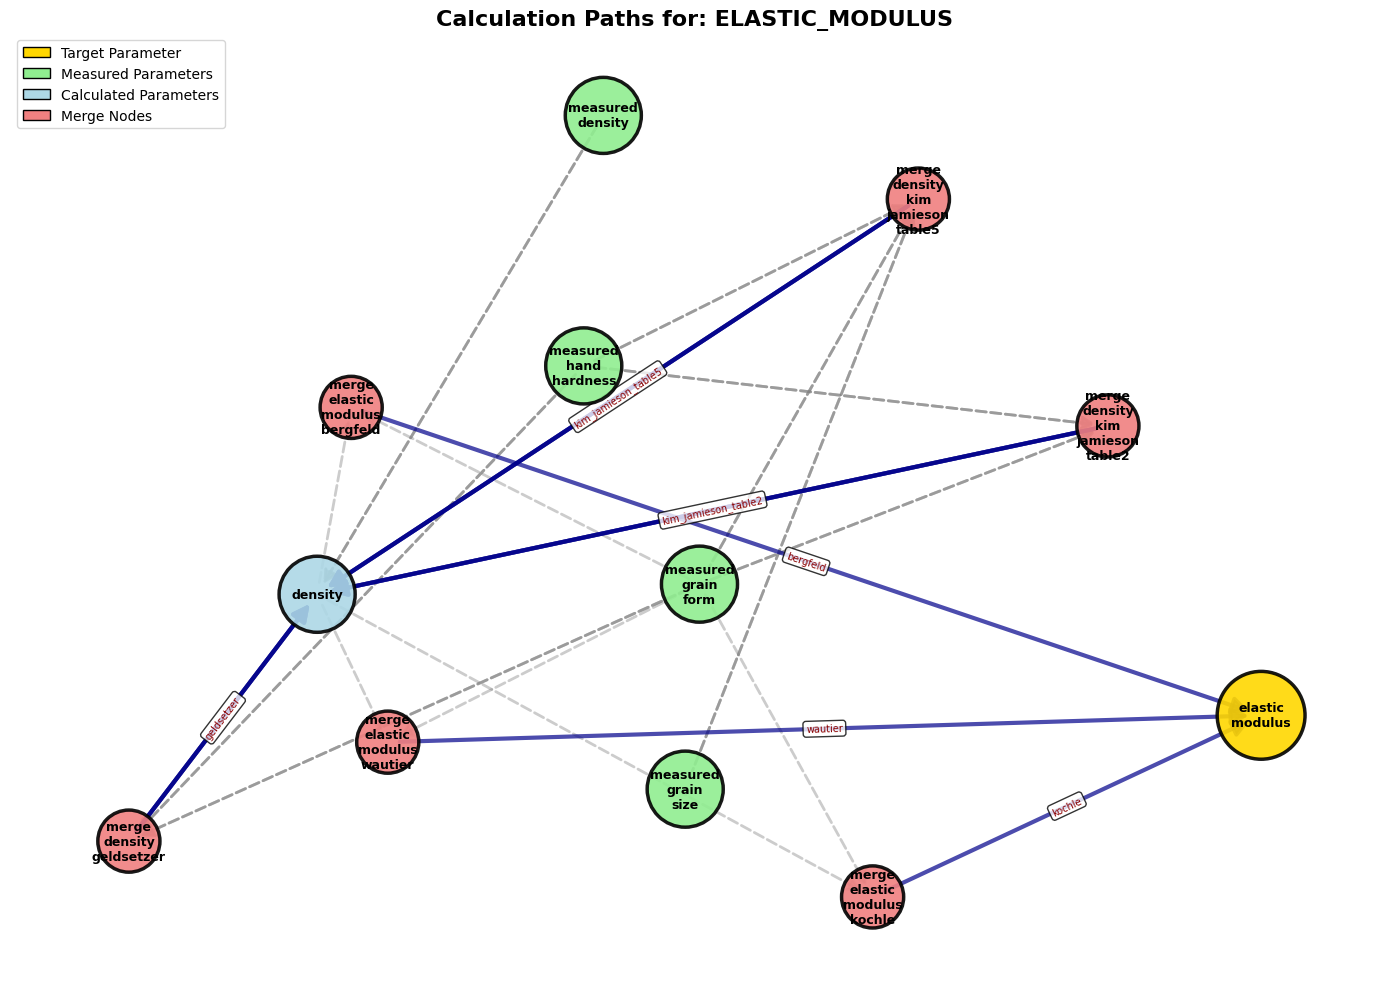

Subgraph for 'elastic_modulus':
  Nodes: 12
  Edges: 42
  Methods available: 12



RecursionError: maximum recursion depth exceeded

In [ ]:
# Create focused subgraph visualization for a specific parameter
def visualize_parameter_subgraph(target_param, title_suffix=""):
    """Create a visualization showing only paths relevant to a specific parameter."""
    
    # Find all nodes involved in calculating this parameter
    relevant_nodes = set()
    relevant_edges = []
    
    def collect_upstream_nodes(node):
        """Recursively collect all upstream nodes."""
        relevant_nodes.add(node.parameter)
        for edge in node.incoming_edges:
            relevant_edges.append(edge)
            collect_upstream_nodes(edge.start)
    
    target_node = next(n for n in graph.nodes if n.parameter == target_param)
    collect_upstream_nodes(target_node)
    
    # Create subgraph
    G_sub = nx.DiGraph()
    for node_name in relevant_nodes:
        G_sub.add_node(node_name)
    
    for edge in relevant_edges:
        G_sub.add_edge(edge.start.parameter, edge.end.parameter, 
                      label=edge.method_name if edge.method_name else "")
    
    # Create layout
    pos_sub = nx.spring_layout(G_sub, k=1.5, iterations=50, seed=42)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Determine node colors
    node_colors = []
    node_sizes = []
    for node in G_sub.nodes():
        node_obj = next(n for n in graph.nodes if n.parameter == node)
        if node == target_param:
            node_colors.append('gold')
            node_sizes.append(4000)
        elif node_obj.type == 'parameter':
            if node in measured_params:
                node_colors.append('lightgreen')
                node_sizes.append(3000)
            else:
                node_colors.append('lightblue')
                node_sizes.append(3000)
        else:  # merge
            node_colors.append('lightcoral')
            node_sizes.append(2000)
    
    # Draw edges
    method_edges = [(e.start.parameter, e.end.parameter) for e in relevant_edges if e.method_name]
    data_edges = [(e.start.parameter, e.end.parameter) for e in relevant_edges if not e.method_name]
    
    nx.draw_networkx_edges(G_sub, pos_sub, edgelist=data_edges,
                          edge_color='gray', style='dashed',
                          alpha=0.4, width=2, arrows=True,
                          arrowsize=20, ax=ax)
    
    nx.draw_networkx_edges(G_sub, pos_sub, edgelist=method_edges,
                          edge_color='darkblue', style='solid',
                          alpha=0.7, width=3, arrows=True,
                          arrowsize=25, ax=ax)
    
    # Draw nodes
    nx.draw_networkx_nodes(G_sub, pos_sub, node_color=node_colors,
                          node_size=node_sizes, alpha=0.9,
                          edgecolors='black', linewidths=2.5, ax=ax)
    
    # Draw labels
    labels = {node: node.replace('_', '\n') for node in G_sub.nodes()}
    nx.draw_networkx_labels(G_sub, pos_sub, labels, font_size=9,
                           font_weight='bold', ax=ax)
    
    # Add edge labels
    edge_labels = {(e.start.parameter, e.end.parameter): e.method_name
                   for e in relevant_edges if e.method_name}
    nx.draw_networkx_edge_labels(G_sub, pos_sub, edge_labels,
                                font_size=7, font_color='darkred',
                                bbox=dict(boxstyle='round,pad=0.3',
                                        facecolor='white', alpha=0.8),
                                ax=ax)
    
    ax.set_title(f'Calculation Paths for: {target_param.upper()}{title_suffix}',
                fontsize=16, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='gold', edgecolor='black', label='Target Parameter'),
        Patch(facecolor='lightgreen', edgecolor='black', label='Measured Parameters'),
        Patch(facecolor='lightblue', edgecolor='black', label='Calculated Parameters'),
        Patch(facecolor='lightcoral', edgecolor='black', label='Merge Nodes'),
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"Subgraph for '{target_param}':")
    print(f"  Nodes: {len(G_sub.nodes())}")
    print(f"  Edges: {len(relevant_edges)}")
    print(f"  Methods available: {len([e for e in relevant_edges if e.method_name])}")
    print()

# Visualize subgraphs for key parameters
print("=" * 80)
print("FOCUSED VISUALIZATIONS FOR EACH CALCULATED PARAMETER")
print("=" * 80)
print()

for param in ['density', 'elastic_modulus', 'poissons_ratio', 'shear_modulus']:
    visualize_parameter_subgraph(param)


## Summary and Quick Reference

### Graph Structure

**Total Components:**
- 18 nodes (8 parameter nodes + 10 merge nodes)
- 33 edges (13 method edges + 20 data flow edges)

### Node Types

1. **Measured Parameters (Green)** - Starting inputs:
   - `measured_density`
   - `measured_hand_hardness`
   - `measured_grain_form`
   - `measured_grain_size`

2. **Calculated Parameters (Blue)** - Target outputs:
   - `density` (4 calculation paths)
   - `elastic_modulus` (3 calculation paths)
   - `poissons_ratio` (3 calculation paths)
   - `shear_modulus` (2 calculation paths)

3. **Merge Nodes (Red)** - Combine inputs for methods:
   - 3 for density calculations
   - 3 for elastic modulus calculations
   - 2 for Poisson's ratio calculations
   - 2 for shear modulus calculations

### Edge Types

- **Solid Blue Arrows**: Method transformations (calculations)
- **Dashed Gray Arrows**: Data flow (parameter passing)

### Available Calculation Methods

**Density:**
- `geldsetzer` (hand_hardness + grain_form)
- `kim_jamieson_table2` (hand_hardness + grain_form)
- `kim_jamieson_table5` (hand_hardness + grain_form + grain_size)

**Elastic Modulus:**
- `bergfeld` (density + grain_form)
- `kochle` (density + grain_form)
- `wautier` (density + grain_form)

**Poisson's Ratio:**
- `kochle` (grain_form only)
- `srivastava` (density + grain_form)
- `from_elastic_and_shear_modulus` (elastic_modulus + shear_modulus)

**Shear Modulus:**
- `wautier` (density + grain_form)
- `from_elastic_modulus_and_poissons_ratio` (elastic_modulus + poissons_ratio)

### Key Insights

1. **Multiple Paths**: Each calculated parameter can be derived through multiple independent methods
2. **Interdependencies**: Some parameters can be calculated from other calculated parameters (e.g., Poisson's ratio from elastic and shear modulus)
3. **Flexibility**: The graph structure allows for different calculation strategies based on available measurements
4. **Method Validation**: Multiple methods for the same parameter enable cross-validation of results
